**Основные цели этого задания:**
*   Попрактиковаться в борьбе с дисбалансом классов
*   Научиться заполнять пропуски в данных
*   Научиться использовать категориальные признаки.

**Задача: по различным признакам, связанным с заявкой на грант, предсказать, будет ли заявка принята.**

*1. Загрузите данные из csv файла. Ознакомьтесь с ними, проверьте наличие пропусков, узнайте типы признаков.*

In [80]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/2.4grant_data_imb.csv', delimiter=',')
df.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Home.Language.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,0,97A,30B,A,321024.0,50.0,321013.0,30.0,291502.0,20.0,0.0,0.0,0.0,0.0,730303.0,50.0,730104.0,30.0,671402.0,20.0,0.0,0.0,0.0,0.0,67037.0,CHIEF_INVESTIGATOR,1950.0,Eastern Europe,NaN,2563.0,25.0,Yes,>10 to 15,2.0,6.0,3.0,5.0,15.0,3.0
1,0,36D,10A,G,300201.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,620108.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12917.0,PRINCIPAL_SUPERVISOR,1955.0,Australia,NaN,1038.0,1.0,NaN,Less than 0,0.0,3.0,0.0,4.0,0.0,0.0
2,0,317A,30D,NaN,321013.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730104.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28607.0,CHIEF_INVESTIGATOR,1965.0,Great Britain,NaN,2763.0,25.0,Yes,>5 to 10,4.0,3.0,6.0,25.0,14.0,14.0
3,0,62B,10B,B,321103.0,30.0,321105.0,40.0,321204.0,30.0,0.0,0.0,0.0,0.0,730211.0,50.0,730302.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,144632.0,CHIEF_INVESTIGATOR,1960.0,Australia,NaN,2848.0,25.0,NaN,Less than 0,1.0,2.0,1.0,0.0,0.0,0.0
4,0,1A,10A,NaN,270603.0,60.0,321205.0,30.0,320603.0,10.0,0.0,0.0,0.0,0.0,730114.0,60.0,730204.0,10.0,730215.0,30.0,0.0,0.0,0.0,0.0,1797.0,CHIEF_INVESTIGATOR,1960.0,North America,NaN,2678.0,25.0,Yes,>5 to 10,5.0,14.0,0.0,9.0,7.0,0.0


In [82]:
pd.set_option('display.max_columns', None)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Grant.Status                            4113 non-null   int64  
 1   Sponsor.Code                            3856 non-null   object 
 2   Grant.Category.Code                     3856 non-null   object 
 3   Contract.Value.Band...see.note.A        1953 non-null   object 
 4   RFCD.Code.1                             3853 non-null   float64
 5   RFCD.Percentage.1                       3853 non-null   float64
 6   RFCD.Code.2                             3853 non-null   float64
 7   RFCD.Percentage.2                       3853 non-null   float64
 8   RFCD.Code.3                             3853 non-null   float64
 9   RFCD.Percentage.3                       3853 non-null   float64
 10  RFCD.Code.4                             3853 non-null   floa

Пропуски в данных есть, и достаточно много, например в колонке Home.Language.1 заполнено всего 394 записи из 4113 

Посмотрим и на количество дубликатов, но удалять мы их не будем:

In [84]:
len(df)- len(df.drop_duplicates ())

65

Всего столбцов 39, из них 30 имеют тип float64, 1 имеет тип int64, 8 имеют тип object

*2. Подготовьте данные к обучению моделей:*
*   Отделите целевую переменную Grant.Status и выясните, сбалансированы ли классы;
*   Заполните пропуски: в количественных признаках заполните пропуски средними значениями и нулями (у каждой фичи будет по два варианта); в категориальных признаках выведите значения, которые они принимают, и найдите признак, где пропуски можно заполнить осмысленным значением. В остальных признаках заполните пропуски значением по умолчанию;
*   Преобразуйте категориальные признаки в количественные с помощью прямого кодирования;
*   Разделите данные на обучающую и тестовую части;
*   Используйте масштабирование для получения признаков одинакового масштаба.

In [85]:
df['Grant.Status'].value_counts()

Grant.Status
0    3259
1     854
Name: count, dtype: int64

Grant.Status имеет значения 1 и 0, но классы не сбалансированы

In [86]:
print(f'Класс 0 {round(3259 / 4113 * 100 , 2)}% от выборки')
print(f'Класс 1 {round(854 / 4113 * 100 , 2)}% от выборки')
print(f'Записей класса 0 больше в {round(3259 / 854, 2)} раз записей класса 1')

Класс 0 79.24% от выборки
Класс 1 20.76% от выборки
Записей класса 0 больше в 3.82 раз записей класса 1


Пройдемся по всем колонкам, где есть пропуски, т.е. по всем, кроме Grant.Status. Еще раз взглянем на наш датасет

Общее количество пропусков:

In [87]:
df.isnull().sum()

Grant.Status                                 0
Sponsor.Code                               257
Grant.Category.Code                        257
Contract.Value.Band...see.note.A          2160
RFCD.Code.1                                260
RFCD.Percentage.1                          260
RFCD.Code.2                                260
RFCD.Percentage.2                          260
RFCD.Code.3                                260
RFCD.Percentage.3                          260
RFCD.Code.4                                260
RFCD.Percentage.4                          260
RFCD.Code.5                                260
RFCD.Percentage.5                          260
SEO.Code.1                                 276
SEO.Percentage.1                           276
SEO.Code.2                                 276
SEO.Percentage.2                           276
SEO.Code.3                                 276
SEO.Percentage.3                           276
SEO.Code.4                                 276
SEO.Percentag

Количество пропусков в процентном соотношении к общей выборке:

In [88]:
(df.isna().sum() / len(df)).round(4) * 100

Grant.Status                               0.00
Sponsor.Code                               6.25
Grant.Category.Code                        6.25
Contract.Value.Band...see.note.A          52.52
RFCD.Code.1                                6.32
RFCD.Percentage.1                          6.32
RFCD.Code.2                                6.32
RFCD.Percentage.2                          6.32
RFCD.Code.3                                6.32
RFCD.Percentage.3                          6.32
RFCD.Code.4                                6.32
RFCD.Percentage.4                          6.32
RFCD.Code.5                                6.32
RFCD.Percentage.5                          6.32
SEO.Code.1                                 6.71
SEO.Percentage.1                           6.71
SEO.Code.2                                 6.71
SEO.Percentage.2                           6.71
SEO.Code.3                                 6.71
SEO.Percentage.3                           6.71
SEO.Code.4                              

In [89]:
df.head(10)

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Home.Language.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,0,97A,30B,A,321024.0,50.0,321013.0,30.0,291502.0,20.0,0.0,0.0,0.0,0.0,730303.0,50.0,730104.0,30.0,671402.0,20.0,0.0,0.0,0.0,0.0,67037.0,CHIEF_INVESTIGATOR,1950.0,Eastern Europe,NaN,2563.0,25.0,Yes,>10 to 15,2.0,6.0,3.0,5.0,15.0,3.0
1,0,36D,10A,G,300201.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,620108.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12917.0,PRINCIPAL_SUPERVISOR,1955.0,Australia,NaN,1038.0,1.0,NaN,Less than 0,0.0,3.0,0.0,4.0,0.0,0.0
2,0,317A,30D,NaN,321013.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730104.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28607.0,CHIEF_INVESTIGATOR,1965.0,Great Britain,NaN,2763.0,25.0,Yes,>5 to 10,4.0,3.0,6.0,25.0,14.0,14.0
3,0,62B,10B,B,321103.0,30.0,321105.0,40.0,321204.0,30.0,0.0,0.0,0.0,0.0,730211.0,50.0,730302.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,144632.0,CHIEF_INVESTIGATOR,1960.0,Australia,NaN,2848.0,25.0,NaN,Less than 0,1.0,2.0,1.0,0.0,0.0,0.0
4,0,1A,10A,NaN,270603.0,60.0,321205.0,30.0,320603.0,10.0,0.0,0.0,0.0,0.0,730114.0,60.0,730204.0,10.0,730215.0,30.0,0.0,0.0,0.0,0.0,1797.0,CHIEF_INVESTIGATOR,1960.0,North America,NaN,2678.0,25.0,Yes,>5 to 10,5.0,14.0,0.0,9.0,7.0,0.0
5,1,4D,10A,F,321015.0,80.0,329903.0,10.0,320503.0,10.0,0.0,0.0,0.0,0.0,730108.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27757.0,CHIEF_INVESTIGATOR,1960.0,Australia,NaN,2813.0,25.0,NaN,>5 to 10,2.0,0.0,11.0,6.0,5.0,0.0
6,0,2B,10A,NaN,240301.0,90.0,240204.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,780102.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145447.0,CHIEF_INVESTIGATOR,1970.0,Great Britain,NaN,3198.0,31.0,Yes,>=0 to 5,0.0,2.0,5.0,7.0,1.0,1.0
7,0,2B,10A,D,260109.0,90.0,260301.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,780104.0,70.0,650103.0,20.0,671401.0,10.0,0.0,0.0,0.0,0.0,1012.0,CHIEF_INVESTIGATOR,1945.0,Australia,English,3123.0,31.0,Yes,>5 to 10,1.0,0.0,11.0,2.0,15.0,0.0
8,0,4D,10A,NaN,320702.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730113.0,80.0,730106.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,78752.0,CHIEF_INVESTIGATOR,1955.0,Western Europe,NaN,2713.0,25.0,Yes,>10 to 15,1.0,5.0,8.0,9.0,6.0,0.0
9,0,60D,30D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16137.0,CHIEF_INVESTIGATOR,1950.0,Australia,NaN,2653.0,25.0,NaN,>5 to 10,1.0,5.0,4.0,3.0,1.0,0.0


Создадим столбцы, где пропуски заполнены нулями и вторые - где пропуски заполнены средним значением

In [90]:
nulls_f_i = df.select_dtypes(include=['float', 'int']).columns
for col1 in nulls_f_i:
    df[col1 + '_zero'] = df[col1].fillna(0)
for col in nulls_f_i:
    df[col1 + '_mean'] = df[col1].fillna(df[col1].mean())

Теперь "очередь" категориальных столбцов. Для начала посмотрим уникальные значения

In [91]:
nulls_o = df.select_dtypes(include=['object']).columns
for col2 in nulls_o:
    print(col2 , df[col2].unique())

Sponsor.Code ['97A' '36D' '317A' '62B' '1A' '4D' '2B' '60D' '21A' '149A' '252D' '65A'
 '40D' '24D' '34B' '166B' '6B' '29A' '5A' '141A' nan '32D' '89A' '52D'
 '18B' '33A' '91C' '12D' '20D' '66B' '145A' '179C' '86B' '42B' '183C'
 '112D' '234B' '49A' '437A' '77A' '83C' '93A' '229A' '84D' '196D' '281A'
 '69A' '161A' '51C' '226B' '269A' '188D' '94B' '173A' '221A' '9A' '126B'
 '133A' '101A' '215C' '172D' '138B' '219C' '59C' '315C' '205A' '247C'
 '194B' '15C' '3C' '55C' '204D' '90B' '163C' '307C' '206B' '95C' '7C'
 '180D' '214B' '197A' '349A' '232D' '325A' '266B' '164D' '63C' '228D'
 '187C' '208D' '241A' '48D' '309A' '73A' '28D' '362B' '39C' '67C' '212D'
 '200D' '148D' '154B' '245A' '311C' '105A' '47C' '222B' '137A' '159C'
 '100D' '143C' '193A' '324D' '38B' '75C' '427C' '103C' '415C' '139C'
 '107C' '136D' '11C' '170B' '135C' '203C' '235C' '331C' '259C' '87C'
 '169A' '284D' '198B' '308D' '242B' '174B' '68D' '120D' '347C' '294B'
 '128D' '56D' '202B' '435C' '80D' '130B' '54B' '195C' '285A' '191C

Теперь мы видим, что пропущенные значения в столбцах Sponsor.Code, Grant.Category.Code, Country.of.Birth.1, Role.1, No..of.Years.in.Uni.at.Time.of.Grant.1 - Можно заполнить значением "unknown"
Contract.Value.Band...see.note.A - Можно заполнить значением "N"
Home.Language.1 - Можно заполнить значением "Other"
With.PHD.1 - Можно заполнить значением "No"

In [92]:
df['Sponsor.Code'].fillna('unknown', inplace=True)
df['Grant.Category.Code'].fillna('unknown', inplace=True)
df['Country.of.Birth.1'].fillna('unknown', inplace=True)
df['Role.1'].fillna('unknown', inplace=True)
df['No..of.Years.in.Uni.at.Time.of.Grant.1'].fillna('unknown', inplace=True)

df['Contract.Value.Band...see.note.A'].fillna('N', inplace=True)

df['Home.Language.1'].fillna('Other', inplace=True)

df['With.PHD.1'].fillna('No', inplace=True)

Удалим столбцы с пропусками

In [93]:
df.dropna(axis=1, inplace=True)

Проверяем, что все пропуски заполнены:

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Grant.Status                            4113 non-null   int64  
 1   Sponsor.Code                            4113 non-null   object 
 2   Grant.Category.Code                     4113 non-null   object 
 3   Contract.Value.Band...see.note.A        4113 non-null   object 
 4   Role.1                                  4113 non-null   object 
 5   Country.of.Birth.1                      4113 non-null   object 
 6   Home.Language.1                         4113 non-null   object 
 7   With.PHD.1                              4113 non-null   object 
 8   No..of.Years.in.Uni.at.Time.of.Grant.1  4113 non-null   object 
 9   Grant.Status_zero                       4113 non-null   int64  
 10  RFCD.Code.1_zero                        4113 non-null   floa

Пропусков нет, отлично. Теперь переведем все категориальные переменные, будем использовать прямое кодирование

In [95]:
df = pd.get_dummies(df, drop_first=True)

Теперь разделим выборки на тестовую и обучающую:

In [107]:
X = df.drop(['Grant.Status', 'Grant.Status_zero'], axis=1)
y = df['Grant.Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

И перейдем к обучению, несбалансированность выборки мы будем прописывать в модели.

*3. Обучите модели и выберите лучшую:*
*   Обучите модель логистической регрессии, используя кросс-валидацию. Оцените ее качество с помощью метрики rocauc. Выведите топ-10 признаков по важности, согласно обученной модели;
*   Обучите модель случайного леса:
*   а) Для подбора гиперпараметров и кросс-валидации используйте структуру GridSearchCV,
*   б) Выберите наилучший вариант случайного леса и выведите его параметры,
*   в) Оцените качество выбранной модели с помощью метрики rocauc,
*   г) Выведите топ-10 признаков по важности. Используйте атрибут feature_importances_, чтобы узнать важность признаков в деревянных моделях.

In [109]:
model_log = LogisticRegressionCV(cv=10, random_state=25, class_weight='balanced', max_iter=1000).fit(X_train_scaler, y_train)
roc_auc_score(y_test , model_log.predict_proba(X_test_scaler)[:, 1])

0.8779194919814876

LogisticRegression: ROC AUC=0.878


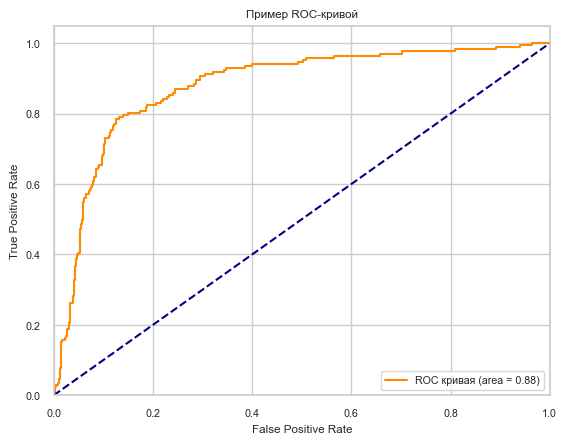

In [110]:
lr_probs = model_log.predict_proba(X_test_scaler)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [111]:
coefficients = model_log.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance[: 10]


,Feature,Importance
25,Number.of.Unsuccessful.Grant.1_zero,1.169227
282,Contract.Value.Band...see.note.A_N,1.059517
24,Number.of.Successful.Grant.1_zero,0.882181
137,Sponsor.Code_24D,0.377580
233,Sponsor.Code_6B,0.364142
269,Grant.Category.Code_unknown,0.333177
256,Sponsor.Code_unknown,0.333177
278,Contract.Value.Band...see.note.A_J,0.300399
188,Sponsor.Code_33A,0.269649
273,Contract.Value.Band...see.note.A_E,0.255244


Получается, что самая важная Feature для логистической регресии - Number.of.Unsuccessful.Grant.1_zero и Contract.Value.Band...see.note.A_N.

**Перейдем к случайному лесу.**

In [112]:
model_rforest = RandomForestClassifier()

In [113]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

grid = GridSearchCV(model_rforest, parametrs, cv=5)
grid.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [114]:
grid.best_params_

{'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

In [115]:
model_rforest_f = RandomForestClassifier(n_estimators = 10, max_depth = 11, min_samples_leaf = 2, min_samples_split = 6)
model_rforest_f.fit(X_train_scaler, y_train)

roc_auc_score(y_test , model_rforest_f.predict_proba(X_test_scaler)[:, 1])

0.8750224231334984

LogisticRegression: ROC AUC=0.875


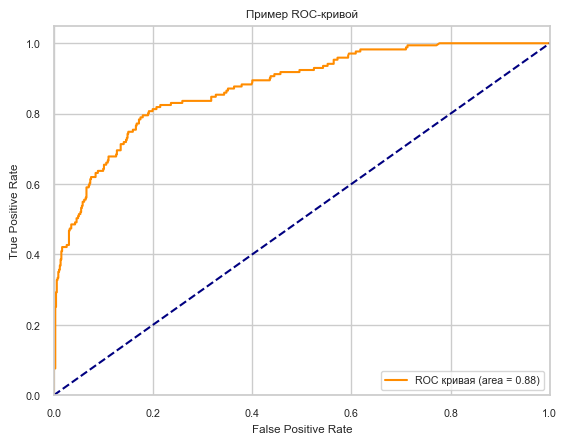

In [116]:
lr_probs_2 = model_rforest_f.predict_proba(X_test_scaler)
lr_probs_2 = lr_probs_2[:, 1]
lr_auc_2 = roc_auc_score(y_test, lr_probs_2)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc_2))
fpr2, tpr2, treshold2 = roc_curve(y_test, lr_probs_2)
roc_auc_2 = auc(fpr2, tpr2)

plt.plot(fpr2, tpr2, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [117]:
feats = {}
for feature, importance in zip(df.columns, model_rforest_f.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
importances[: 10]

,Features,Gini-Importance
0,Faculty.No..1_zero,0.207535
1,Contract.Value.Band...see.note.A_L,0.110415
2,Dept.No..1_zero,0.093149
3,Sponsor.Code_97A,0.036108
4,Person.ID.1_zero,0.031582
5,A.1_zero,0.026504
6,RFCD.Code.5_zero,0.026240
7,SEO.Percentage.5_zero,0.024684
8,SEO.Code.5_zero,0.024076
9,SEO.Code.1_zero,0.022454


Для модели RandomForestClassifier самая важная Feature - Grant.Status

*4. Напишите вывод, в котором будет содержаться информация о том, какие признаки важны согласно обеим моделям, и какая модель оказалась наилучшей для решения поставленной задачи.*

Сперва оценим какие признаки оказались "важнее" нашим моделям:
*   Для LogisticRegressionCV самая важная - Number.of.Unsuccessful.Grant.1_zero и Contract.Value.Band...see.note.A_N. Менее важные: Number.of.Successful.Grant.1_zero
*   Для RandomForestClassifier самая важная - Faculty.No..1_zero. Менее важные: Contract.Value.Band...see.note.A_L, Dept.No..1_zero

Теперь сравним точность этих моделей путем сравнения ROC AUC:
*   LogisticRegressionCV - ROC AUC=0.8779
*   RandomForestClassifier - ROC AUC=0.8750

В целом, можно говорить о том, что обе модели отработали на одном уровне. Не получится выделить ту, которая однозначно справилась лучше с этой задачей